# Caída libre con resitencia del aire

In [1]:
import numpy as np
from IPython.display import Image

Sistema de ecuaciones diferenciales ordinarias
$$ \frac{dy}{dt} = v, \qquad \frac{dv}{dt} = -g -k\,v $$

Sistema de encuaciones diferenciales a resolver:

\begin{equation}
\frac{d\vec{u}}{dt} = \vec{f}
\end{equation}

donde

\begin{equation}
\vec{u} = [y,v]
\end{equation}

y 

\begin{equation}
\vec{f} = [v,-g-k v]
\end{equation}


Parámetros:

In [2]:
g, k = 9.81, 0.5

Condiciones iniciales

In [3]:
y0, v0 = 10, 10
u0 = np.array([y0, v0])

La función $f_i$:

In [4]:
def CaidaLibre(u, t, g, k):  #particular para el problema de caida libre
    derivs = np.array([u[1],  -k*u[1] -g ])# np.array of dy/dt=f functions
    return derivs

Tiempos de simulación:

Tiempo de vuelo para el caso sin resistencia del aire: $$ t_v = \frac{v_0+\sqrt{v_0^2+2\,g\,y_0}}{g}$$

In [5]:
tv = (v0+np.sqrt(v0**2+2*g*y0))/g

In [6]:
#tInc es el Delta t (h)
tInc = 0.01
tStop = tv + tInc
t = np.arange(0., tStop, tInc)

Método de Euler:

Queremos hallar $\vec{u}(t)$

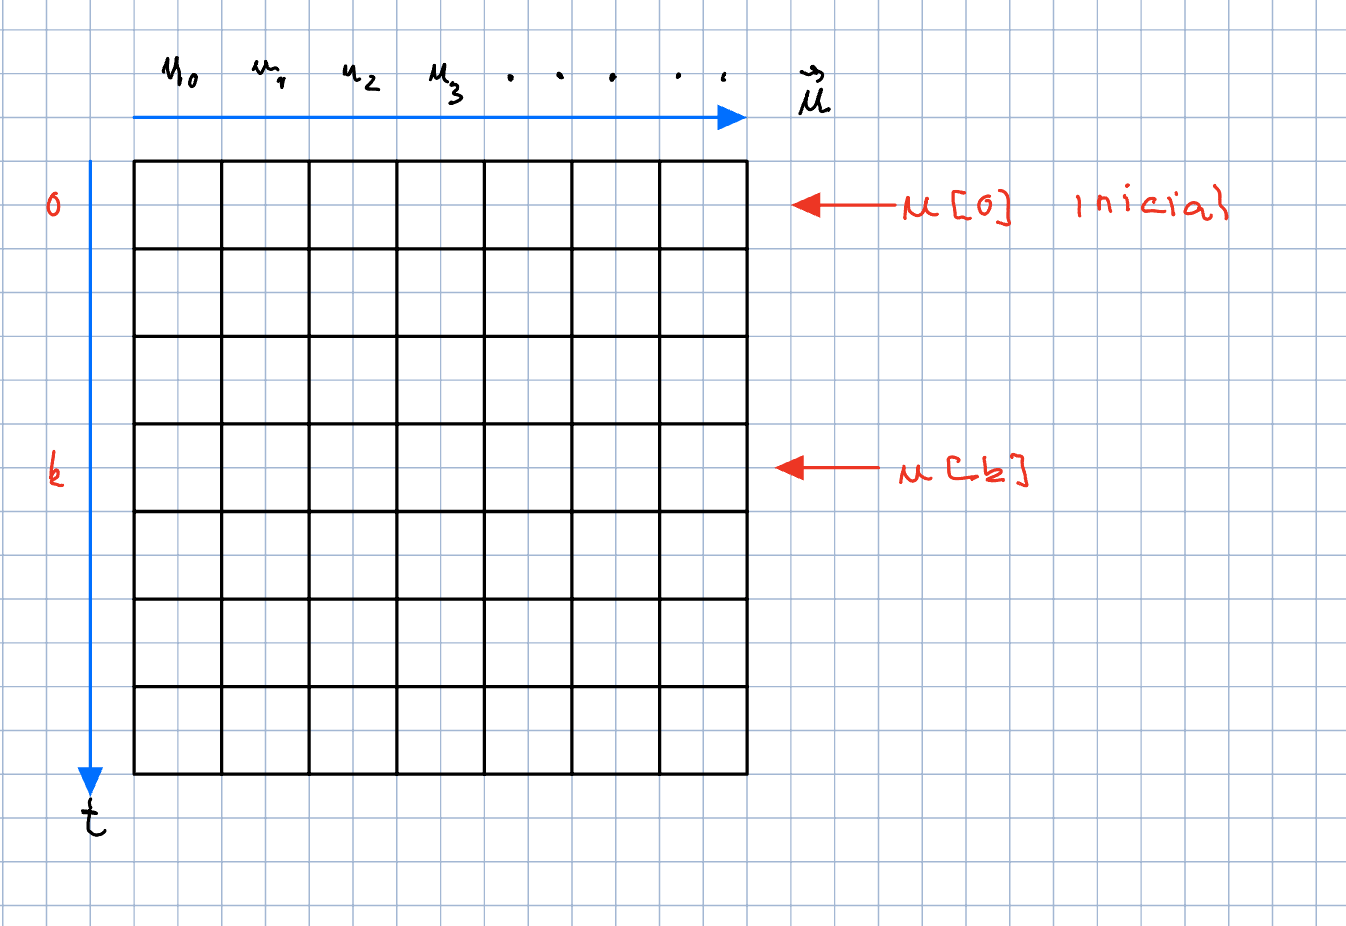

In [7]:
Image("vectoru.png",width = 500, height = 500)

### Problema General:

\begin{equation}
\frac{d \vec{u}}{dt}= \vec{f}(\vec{u},t)
\end{equation}

Método de Euler:

\begin{eqnarray}
\vec{u}_{i+1} &=& \vec{u}_i + \vec{k}_1\,h\\
\vec{k}_1 &=& \vec{f}(\vec{u}_i,t_i)\nonumber\\
\end{eqnarray}

In [8]:
def Euler(f_user, U0, t, *args):

    n = t.size
    
    neq = U0.size
    u = np.zeros((n, neq)) #n renglones, neq columnas 
    
    u[0] = U0
    
    dt = t[1]-t[0] # h
    
    for k in range(n-1):
        u[k+1] = u[k] + dt*f_user(u[k], t[k],*args)
        
    return u

\*args: argumentos identificados por posicion

\**kwargs: argumentos determinados por nombre

Solución del problema

In [9]:
psolnE = Euler(CaidaLibre,u0,t,g,k)

¿Cómo analizamos la solución? Grafiquemos

In [10]:
import matplotlib.pyplot as plt

#### Características generales de las gráficas:

In [11]:
plt.rcParams['font.size'] = '16'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Tahoma']
plt.rc('text',usetex = True)
#plt.rc('mathtext',fontset = 'stix')

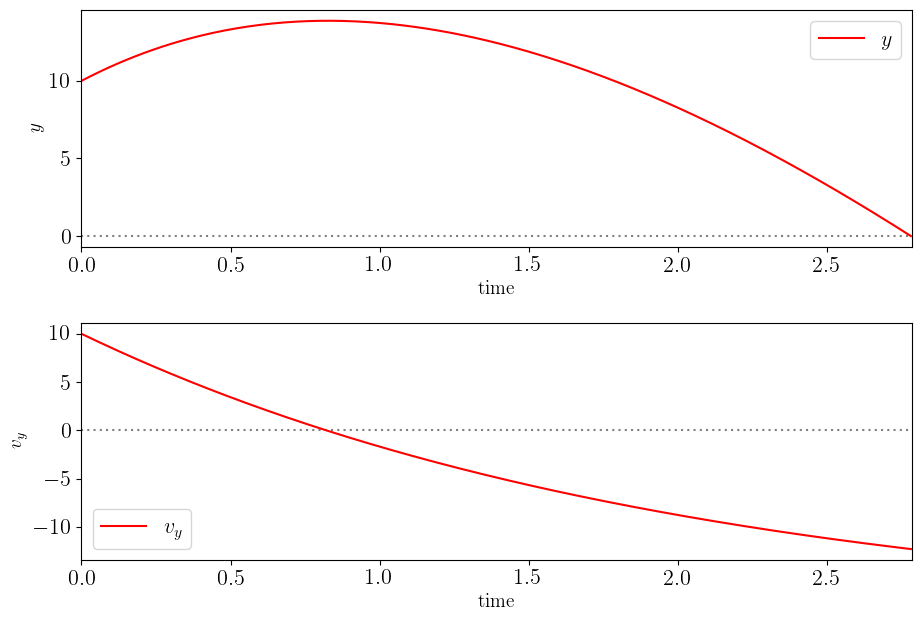

In [12]:
plt.figure(figsize=(9.5,6.5))
plt.subplot(2,1,1)
plt.plot(t,psolnE[:,0],color = 'red',label = r'$y$')
plt.xlabel('time',fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.xlim(0.,tStop)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
plt.legend(loc = 'upper right')


# Plot velicity as a function of time
plt.subplot(212)
plt.plot(t, psolnE[:, 1], color='red',label = r'$v_y$')
plt.xlabel('time', fontsize=14)
plt.ylabel(r'$v_y$', fontsize=14)
plt.xlim(0., tStop)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
plt.legend(loc = 'lower left')

plt.tight_layout()
plt.show()

Solución analítica en el vacío
$$ y = y_0 + v_0t - \frac{1}{2}\,gt^2,\qquad v = v_0-gt$$

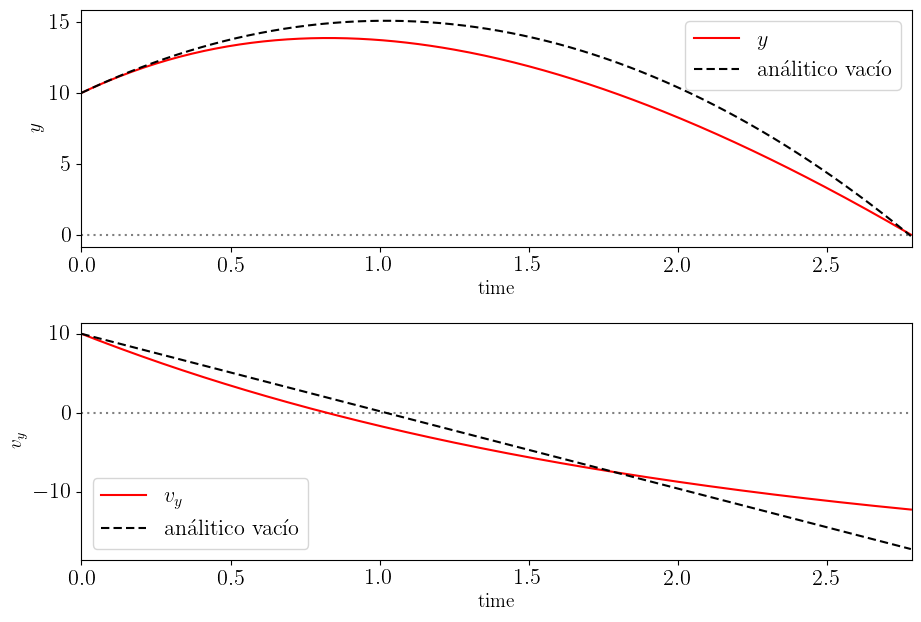

In [13]:
# Plot results

plt.figure(figsize=(9.5,6.5))
plt.subplot(2,1,1)
plt.plot(t,psolnE[:,0],color = 'red',label = r'$y$')
plt.xlabel('time',fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.xlim(0.,tStop)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
y = y0 + v0*t -0.5*g*t**2
plt.plot(t, y, dashes=(4, 2), color='black',label = "análitico vacío")
plt.legend(loc = 'upper right')

# Plot velicity as a function of time
plt.subplot(212)
plt.plot(t, psolnE[:, 1], color='red',label = r'$v_y$')
plt.xlabel('time', fontsize=14)
plt.ylabel(r'$v_y$', fontsize=14)
plt.xlim(0., tStop)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
v = v0 - g*t
plt.plot(t, v, dashes=(4, 2), color='black',label = "análitico vacío")
plt.legend(loc = 'lower left')

plt.tight_layout()
plt.show()

### Problema General:

\begin{equation}
\frac{d \vec{u}}{dt}= \vec{f}(\vec{u},t)
\end{equation}

Método de Heun:

\begin{eqnarray}
\vec{u}_{i+1} &=& \vec{u}_i + \frac{1}{2} (\vec{k}_1+\vec{k}_2)\,h\\
\vec{k}_1 &=& \vec{f}(\vec{u}_i,t_i)\nonumber\\
\vec{k}_2 &=& \vec{f}(\vec{u}_i+ \vec{k}_1h,t_i + h).\nonumber
\end{eqnarray}

In [14]:
def Heun(f_user, U0, t, *args):

    n = t.size
    neq = U0.size
    u = np.zeros((n, neq))

    u[0] = U0
    
    dt = t[1]-t[0]
    
    for i in range(n-1):
        k1 = f_user(u[i], t[i],*args)
        k2 = f_user(u[i]+k1*dt, t[i+1],*args)
        u[i+1] = u[i] + dt* (k1+k2)/2.
    return u


In [15]:
psolnH = Heun(CaidaLibre,u0,t,g,k)

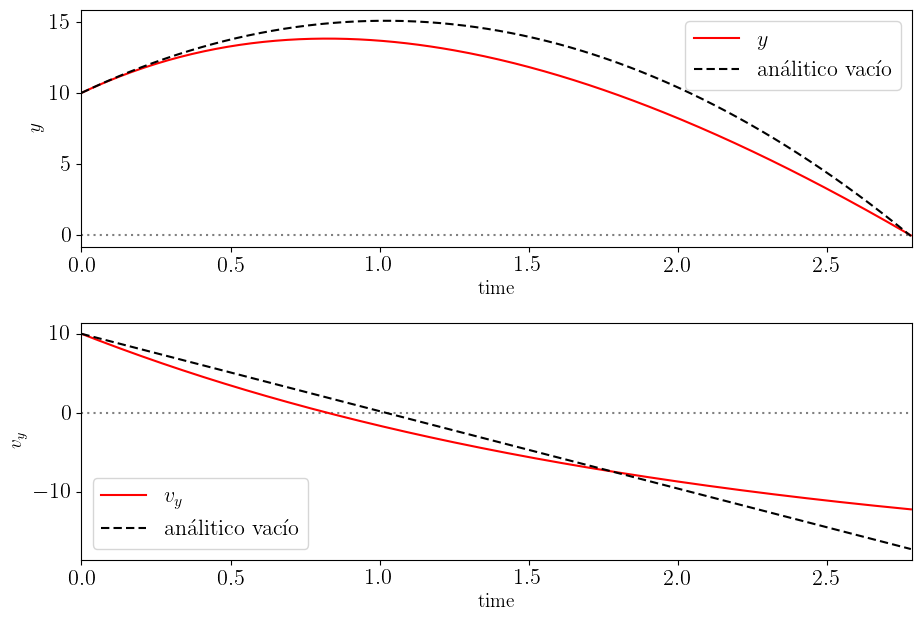

In [16]:
# Plot results

plt.figure(figsize=(9.5,6.5))
plt.subplot(2,1,1)
plt.plot(t,psolnH[:,0],color = 'red',label = r'$y$')
plt.xlabel('time',fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.xlim(0.,tStop)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
y = y0 + v0*t -0.5*g*t**2
plt.plot(t, y, dashes=(4, 2), color='black',label = "análitico vacío")
plt.legend(loc = 'upper right')

# Plot velicity as a function of time
plt.subplot(212)
plt.plot(t, psolnH[:, 1], color='red',label = r'$v_y$')
plt.xlabel('time', fontsize=14)
plt.ylabel(r'$v_y$', fontsize=14)
plt.xlim(0., tStop)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
v = v0 - g*t
plt.plot(t, v, dashes=(4, 2), color='black',label = "análitico vacío")
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

Comparación de los dos métodos

In [17]:
#Parámetros

g, k = 9.81, 0.5

#Condiciones iniciales
y0, v0 = 100, 10
u0 = np.array([y0, v0])

#tiempos de simulacion
tv = (v0+np.sqrt(v0**2+2*g*y0))/g
print(tv)

tmax = float(input("tiempo máximo de simulación?   "))
tInc = 0.5
tStop = (1.+ tInc)*tmax
t = np.arange(0., tStop, tInc)


5.648241606419053
tiempo máximo de simulación?   7


In [18]:
psolnH = Heun(CaidaLibre,u0,t,g,k)
psolnE = Euler(CaidaLibre,u0,t,g,k)


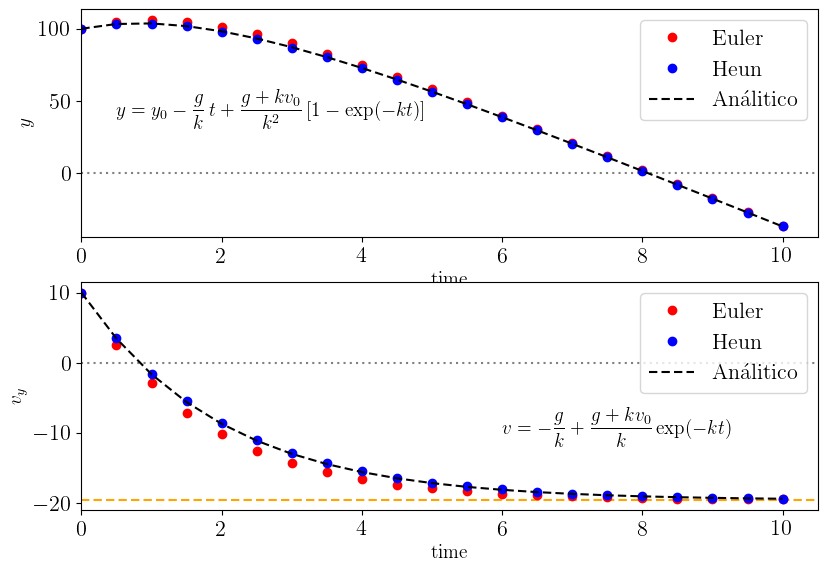

<Figure size 640x480 with 0 Axes>

In [19]:
# Plot results

plt.figure(figsize=(9.5,6.5))
plt.subplot(2,1,1)
plt.plot(t,psolnE[:,0],'o',color = 'red',label = 'Euler')
plt.plot(t, psolnH[:, 0],'o',color='blue',label = 'Heun')
plt.xlabel('time',fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
plt.xlim(0.,tStop)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
y = y0 - (g/k)*t +(g+k*v0)*(1-np.exp(-k*t))/k**2.
plt.plot(t, y, dashes=(4, 2), color='black',label = "Análitico")
plt.legend(loc = 'upper right')
plt.rc('text',usetex = True)  #Para el uso de latex
#plt.rc('mathtext', fontset='stix') #Para el uso de mathtext
plt.text(0.5,40.,r'$\displaystyle y = y_0 - \frac{g}{k}\,t + \frac{g+kv_0}{k^2}\,[1-\exp(-k t)]$',fontsize = 14)

# Plot velicity as a function of time
plt.subplot(212)
plt.plot(t, psolnE[:, 1],'o',color='red',label = 'Euler')
plt.plot(t, psolnH[:, 1],'o', color='blue',label = 'Heun')
plt.xlabel('time', fontsize=14)
plt.ylabel(r'$v_y$', fontsize=14)
plt.xlim(0., tStop)
plt.axhline(color='gray',dashes=(1, 2),zorder=-1)
v = -g/k + (g+k*v0)*np.exp(-k*t)/k
plt.plot(t, v, dashes=(4, 2), color='black',label = "Análitico")
plt.legend(loc = 'upper right')
plt.rc('text',usetex = True)  #Para el uso de latex
#plt.rc('mathtext', fontset='stix') #Para el uso de mathtext
plt.text(6,-10.,r'$\displaystyle v = - \frac{g}{k} + \frac{g+kv_0}{k}\exp(-k t)$',fontsize = 14)
plt.axhline(-g/k,color='orange',dashes=(4, 2),zorder=-1)
plt.show()

plt.tight_layout()

#ax1.text(1,60.,r'$\displaystyle y = y_0 - \frac{g}{k}\,t + \frac{g+kv_0}{k^2}\,[1-\exp(-k t)]$',fontsize = 14)

#ax2.text(6,-10.,r'$\displaystyle v = - \frac{g}{k} + \frac{g+kv_0}{k}\,\exp(-k t)$',fontsize = 14)
    


### Alternativa para graficación

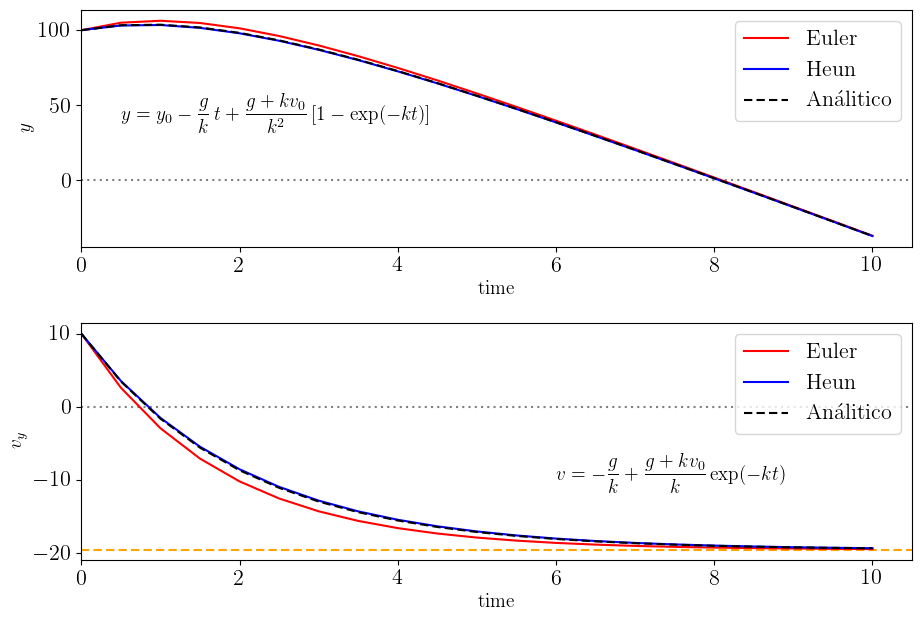

In [20]:
# Plot results

fig = plt.figure(figsize=(9.5,6.5))
#plt.title('Caída Libre',fontsize = '18')
ax1 = fig.add_subplot(211)
ax1.plot(t,psolnE[:,0],color = 'red',label = 'Euler')
ax1.plot(t, psolnH[:, 0], color='blue',label = 'Heun')
ax1.set_xlabel('time',fontsize=14)
ax1.set_ylabel(r'$y$', fontsize=14)
ax1.set_xlim(0.,tStop)
ax1.axhline(color='gray',dashes=(1, 2),zorder=-1)
y = y0 - (g/k)*t +(g+k*v0)*(1-np.exp(-k*t))/k**2.
ax1.plot(t, y, dashes=(4, 2), color='black',label = "Análitico")
ax1.legend(loc = 'upper right')
#plt.rc('text',usetex = True)  #Para el uso de latex
plt.rc('mathtext', fontset='stix') #Para el uso de mathtext
ax1.text(0.5,40.,r'$\displaystyle y = y_0 - \frac{g}{k}\,t + \frac{g+kv_0}{k^2}\,[1-\exp(-k t)]$',fontsize = 14)

# Plot velicity as a function of time
ax2 = fig.add_subplot(212)
ax2.plot(t, psolnE[:, 1], color='red',label = 'Euler')
ax2.plot(t, psolnH[:, 1], color='blue',label = 'Heun')
ax2.set_xlabel('time', fontsize=14)
ax2.set_ylabel(r'$v_y$', fontsize=14)
ax2.set_xlim(0., tStop)
ax2.axhline(color='gray',dashes=(1, 2),zorder=-1)
v = -g/k + (g+k*v0)*np.exp(-k*t)/k
ax2.plot(t, v, dashes=(4, 2), color='black',label = "Análitico")
ax2.legend(loc = 'upper right')
#plt.rc('text',usetex = True)  #Para el uso de latex
plt.rc('mathtext', fontset='stix') #Para el uso de mathtext
ax2.text(6,-10.,r'$\displaystyle v = - \frac{g}{k} + \frac{g+kv_0}{k}\exp(-k t)$',fontsize = 14)
ax2.axhline(-g/k,color='orange',dashes=(4, 2),zorder=-1)
fig.tight_layout()
plt.show()



### Runge-Kutta de cuarto orden

\begin{eqnarray}
\vec{u}_{i+1} &=& \vec{u}_i + \frac{1}{6}( \vec{k}_1+2\vec{k}_2+2\vec{k}_3+\vec{k}_4)\,h\\
\vec{k}_1 &=& \vec{f}(\vec{u}_i,t_i)\nonumber\\
\vec{k}_2 &=&  \vec{f}\left(\vec{u}_i+ \frac{1}{2}\vec{k}_1h, t_i + \frac{1}{2}h\right) \nonumber\\
\vec{k}_3 &=&  \vec{f}\left(\vec{u}_i+ \frac{1}{2}\vec{k}_2h,t_i + \frac{1}{2}h\right) \nonumber\\
\vec{k}_4 &=&  \vec{f}(\vec{u}_i+\vec{k}_3h,t_i+h)\nonumber .
\end{eqnarray}